In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
def DLR_decomposition(A):
    D = np.zeros([len(A),len(A)])
    L = np.zeros([len(A),len(A)])
    R = np.zeros([len(A),len(A)])
    invD = np.zeros([len(A),len(A)])
    for i in range(len(A)):
        for j in range(len(A)):
            if i == j:
                D[i][j] = A[i][j]
                invD[i][j] = 1/A[i][j]
            if i > j:
                L[i][j] = - A[i][j]
            if i < j:
                R[i][j] = - A[i][j]
    return [D,L,R,invD]


def SOR(A,b,iteration_count,omega):
    x = np.zeros(len(A))
    D,L,R,invD = DLR_decomposition(A)
    I = np.identity(len(A))
    
    for i in range(iteration_count):
        x = np.dot(I - omega * np.dot(np.linalg.inv(D - omega * L),A) , x) + omega * np.dot(np.linalg.inv(D - omega * L),b)
        
    return x

def poisson_matrix(h):
    PM = np.zeros([h**2,h**2])
    for i in range(0,h):
        PM[i][i] = 1
    for i in range(h,h**2-h):
        if i%h==0:
            PM[i][i] = 1
        elif i%h==h-1:
            PM[i][i] = 1
        else:
            PM[i][i] = 4
            PM[i][i-1] = -1
            PM[i][i+1] = -1
            PM[i][i-h] = -1
            PM[i][i+h] = -1
    for i in range(h**2-h,h**2):
        PM[i][i] = 1
    return PM

# delení intervalu - vrátí vektor (x,y) z pozice u_i v matici
def interval_0_1x0_1(n,h):
    x = ((n-1)%h)/(h-1)
    y = ((n-1)//h)/(h-1)
    return np.array([x,y])

# vytvoří pravou stranu soustavy rovnic
def b_vector(q,f,h):
    b = np.zeros([h**2])
    for i in range(0,h):
        u = interval_0_1x0_1(i+1,h)
        b[i] = q(u)
    for i in range(h,h**2-h):
        u = interval_0_1x0_1(i+1,h)
        if i%h==0:
            b[i] = q(u)
        elif i%h==h-1:
            b[i] = q(u)
        else:
            b[i] = f(u)
    for i in range(h**2-h,h**2):
        u = interval_0_1x0_1(i+1,h)
        b[i] = q(u)
    return b

# rozklad vektoru u na matici U
def decomposition_u(u):
    h = int(np.sqrt(len(u)))
    U = np.zeros([h,h])
    for i in range(1,len(u)+1):
        x = (i-1)%h
        y = (i-1)//h
        U[x][y] = u[i-1]
    return U


In [3]:
# poc. podminky pro parcialni diferencialní rovnici
def q_fce(u):
    return 1
    
def q_fce_2(u):
    x=u[0]
    y=u[1]
    return 5*x

# pravá strana pro parcialni diferencialní rovnici
def f_fce(u):
    x=u[0]
    y=u[1]
    result = np.sin(np.pi*x)*np.sin(np.pi*y)
    return result

def f_fce_2(u):
    x=u[0]
    y=u[1]
    result = np.sin(2*np.pi*x)*np.sin(2*np.pi*y)
    return result

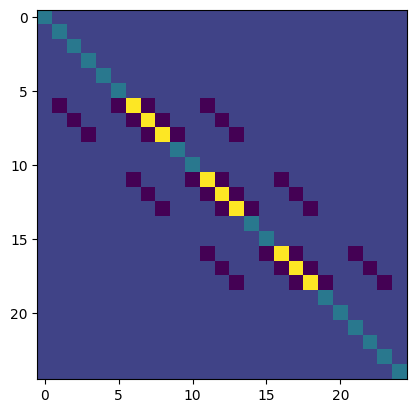

In [4]:
plt.imshow(poisson_matrix(5))

In [5]:
h = 11
x = np.linspace(0,1,h)
y = np.linspace(0,1,h)
X,Y = np.meshgrid(x,y)
A = poisson_matrix(h)
b = b_vector(q_fce,f_fce,h)
z1 = SOR(A,b,10,1)
Z1 = decomposition_u(z1)
z2 = SOR(A,b,50,1)
Z2 = decomposition_u(z2)
dZ = Z2 - Z1
print('mean square error: '+str(np.linalg.norm(dZ)))

mean square error: 12.646602977031757


q(x,y) = 1, f(x,y)=sin(pi*x)*sin(pi*y)


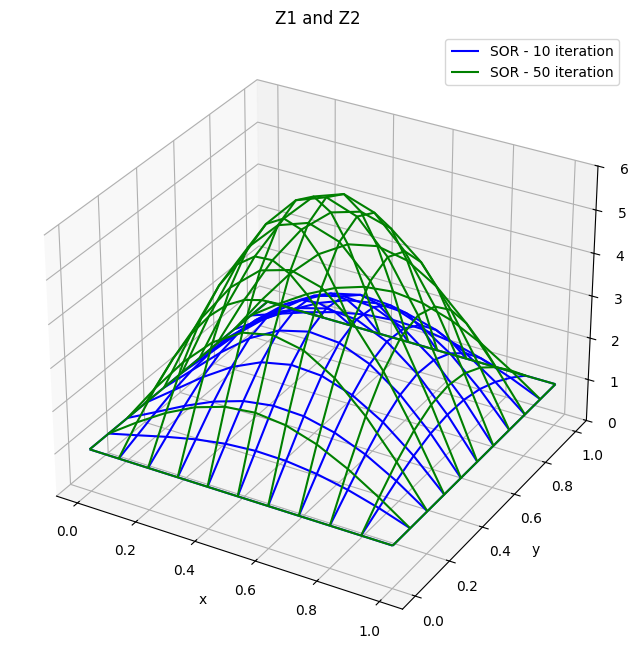

In [6]:
fig = plt.figure(figsize=(16,8))
ax = plt.axes(projection="3d")
ax.plot_wireframe(X, Y, Z1, color='blue', label = 'SOR - 10 iteration')
ax.plot_wireframe(X, Y, Z2, color='green', label = 'SOR - 50 iteration')
ax.set_title("Z1 and Z2")
ax.set_zlim([0,6])
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
print("q(x,y) = 1, f(x,y)=sin(pi*x)*sin(pi*y)")

Text(0.5, 0, 'z')

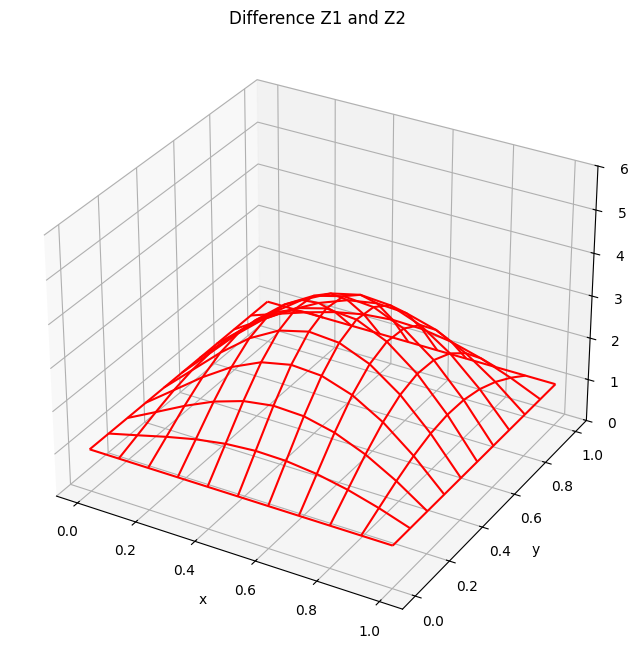

In [7]:
fig = plt.figure(figsize=(16,8))
ax = plt.axes(projection="3d")
ax.plot_wireframe(X, Y, Z1, color='red')
ax.set_title("Difference Z1 and Z2")
ax.set_zlim([0,6])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

In [8]:
h = 11
A = poisson_matrix(h)
b = b_vector(q_fce,f_fce,h)
omega = np.linspace(0.7,2.0,40)
MSE = list()
for i in omega:
    z1 = SOR(A,b,10,i)
    Z1 = decomposition_u(z1)
    z2 = SOR(A,b,100,1)
    Z2 = decomposition_u(z2)
    dZ = Z2 - Z1
    MSE.append(np.linalg.norm(dZ))

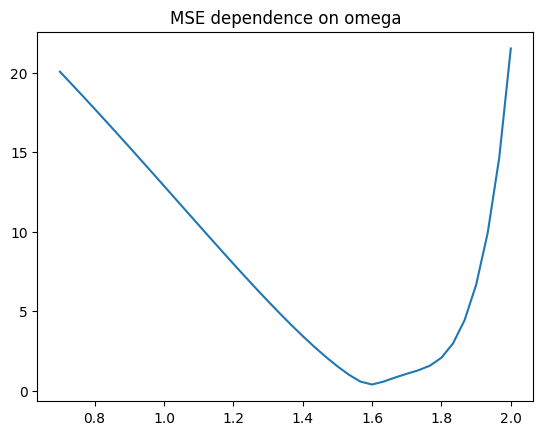

popisuje střední kvadratickou odchylku SOR metody se 100 iteracemi a omega = 1a SOR metody s 10


In [10]:
plt.plot(omega,MSE)
plt.title("MSE dependence on omega")
plt.show()
print("popisuje střední kvadratickou odchylku SOR metody se 100 iteracemi a omega = 1a SOR metody s 10")

In [11]:
h = 20
x = np.linspace(0,1,h)
y = np.linspace(0,1,h)
X,Y = np.meshgrid(x,y)
A = poisson_matrix(h)
b = b_vector(q_fce_2,f_fce_2,h)
u1 = SOR(A,b,10,1)
U1 = decomposition_u(u1)

q = 5x , f = sin(2pix)* sin(2piy)


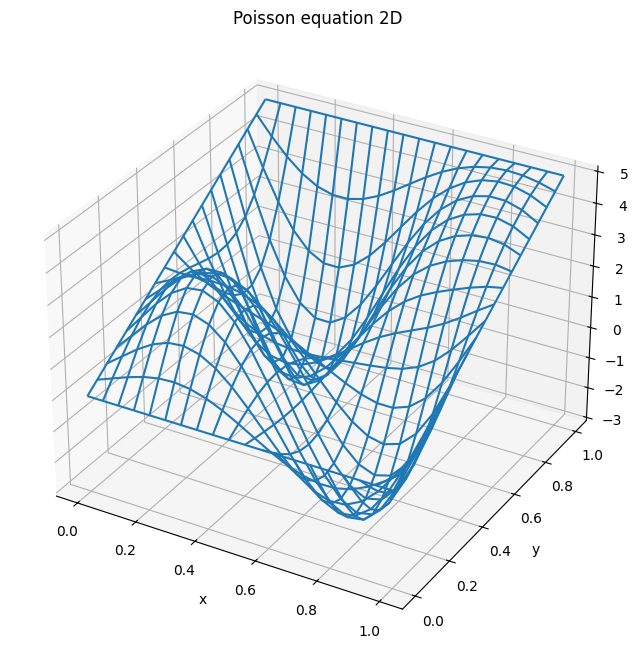

In [12]:
fig = plt.figure(figsize=(16,8))
ax = plt.axes(projection="3d")
ax.plot_wireframe(X, Y, U1)
ax.set_title("Poisson equation 2D")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
print('q = 5x , f = sin(2pix)* sin(2piy)')